# Regularized logistic regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plot_utils
from logistic_regressor import LogisticRegressor

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Plotting data with green circle indicating (y=1) examples and red circle indicating (y=0) examples ...


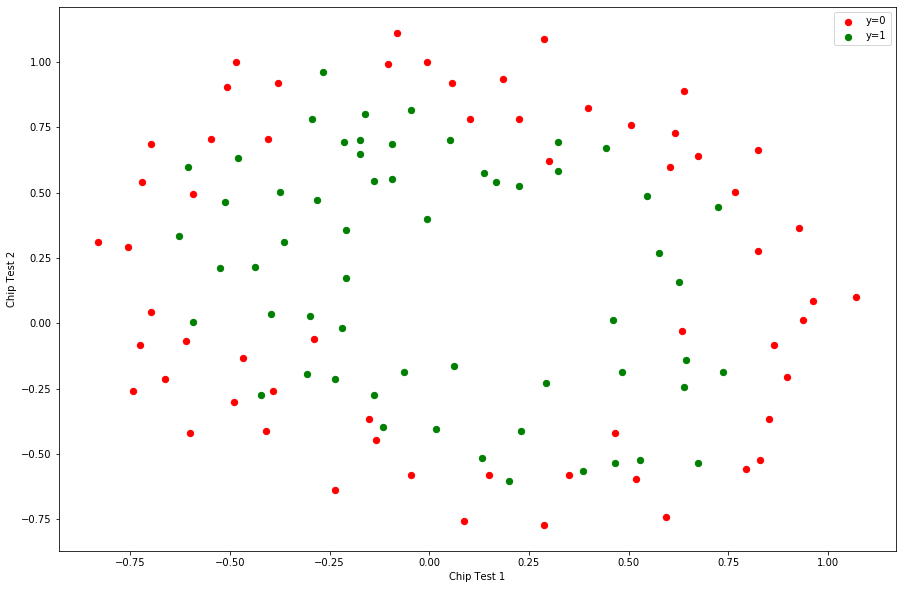

In [2]:
##================ Part 0: Reading data and plotting ==================#

import pandas as pd
import numpy as np

data = pd.read_csv('ex2data2.txt')
X = np.vstack([data.x1,data.x2]).T
y = data.y

print('Plotting data with green circle indicating (y=1) examples and red circle indicating (y=0) examples ...')
plot_utils.plot_twoclass_data(X,y,'Chip Test 1', 'Chip Test 2',['y=0','y=1'])
plt.show()

In [3]:
XX = np.vstack([np.ones((X.shape[0],)),X.T]).T
from logistic_regressor import RegLogisticRegressor
log_reg1 = RegLogisticRegressor()
theta = np.ones((XX.shape[1],))
loss = log_reg1.loss(theta,XX,y,100)
grad = log_reg1.grad_loss(theta,XX,y,100)

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 48
         Gradient evaluations: 48
Theta found by fmin_bfgs: [ 1.27268739  0.62557016  1.1809665  -2.01919822 -0.91761468 -1.43194199
  0.12375921 -0.36513086 -0.35703388 -0.17485805 -1.45843772 -0.05129676
 -0.61603963 -0.2746414  -1.19282569 -0.24270336 -0.20570022 -0.04499768
 -0.27782709 -0.29525851 -0.45613294 -1.04377851  0.02762813 -0.29265642
  0.01543393 -0.32759318 -0.14389199 -0.92460119]
Final loss = 0.4625


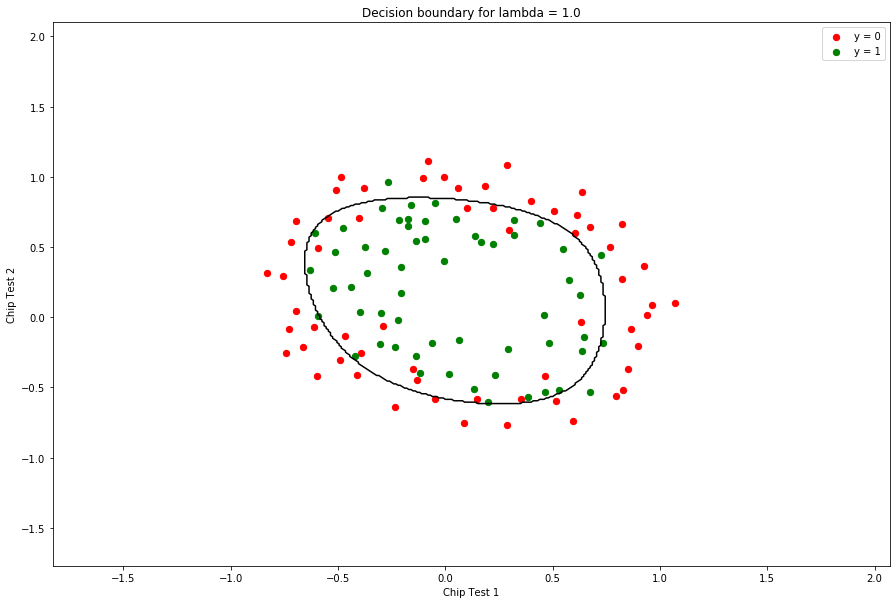

In [4]:
#================ Part 1: Compute cost and gradient ==================#
# open logistic_regressor.py and implement the regularized loss function 
# and gradient 

# map the features in ex2data2.txt into a pth order polynomial

import sklearn
from sklearn.preprocessing import PolynomialFeatures

# Map X onto polynomial features and normalize

p = 6
poly = sklearn.preprocessing.PolynomialFeatures(degree=p,include_bias=False)
X_poly = poly.fit_transform(X)

# set up the data matrix (expanded basis functions) with the column of ones as intercept

XX = np.vstack([np.ones((X_poly.shape[0],)),X_poly.T]).T

# set up a regularized logistic regression model

from logistic_regressor import RegLogisticRegressor

reg_lr1 = RegLogisticRegressor()

# run fmin on the loss function and gradient 

reg = 1.0
theta_opt = reg_lr1.train(XX,y,reg=reg,num_iters=1000,norm=False)

# print the theta found and the final loss

print('Theta found by fmin_bfgs: %s' %theta_opt)
print("Final loss = %.4f" %reg_lr1.loss(theta_opt,XX,y,0.0))

# plot the decision boundary

plot_utils.plot_decision_boundary_poly(X,y,theta_opt,reg,p,'Chip Test 1', 'Chip Test 2',['y = 0','y = 1'])
plt.show()


In [5]:
# compute accuracy on training set
# implement the predict method in logistic_regressor.py

reg_lr1.theta = theta_opt
predy = reg_lr1.predict(XX)

# TODO: fill in the expression for accuracy of prediction
accuracy = np.mean(predy == y)
print("Accuracy on the training set = %.4f" %accuracy)

Accuracy on the training set = 0.8305


### Problem 4B3: Varying $\lambda$

Optimization terminated successfully.
         Current function value: 0.224569
         Iterations: 546
         Function evaluations: 547
         Gradient evaluations: 547
Theta found by fmin_bfgs is [   35.10191207    44.11915831    69.27188708  -344.27906237
  -198.23461737  -184.22840662  -295.82040159  -621.73274229
  -510.8493606   -328.3118716   1094.7003361   1269.58586619
  1757.74907926   900.93790104   436.58885189   471.12030119
  1236.23865174  1822.82037268  1929.66776285  1131.05328233
   463.79934634 -1142.11735857 -2020.95912368 -3463.39981457
 -3484.51070995 -3252.26773148 -1546.00953115  -510.41274014]
Final loss is 0.2246


D:\Rice\COMP 540\Statistical-ML\hw2\logreg\utils.py:21: RuntimeWarning: overflow encountered in exp
  sig = 1 / (1 + np.exp(-z))


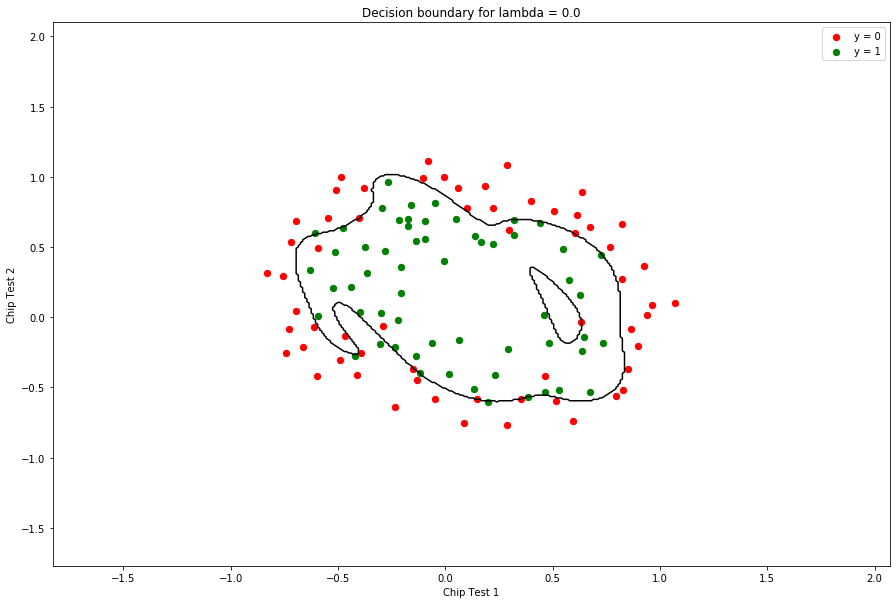

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 48
         Gradient evaluations: 48
Theta found by fmin_bfgs is [ 1.27268739  0.62557016  1.1809665  -2.01919822 -0.91761468 -1.43194199
  0.12375921 -0.36513086 -0.35703388 -0.17485805 -1.45843772 -0.05129676
 -0.61603963 -0.2746414  -1.19282569 -0.24270336 -0.20570022 -0.04499768
 -0.27782709 -0.29525851 -0.45613294 -1.04377851  0.02762813 -0.29265642
  0.01543393 -0.32759318 -0.14389199 -0.92460119]
Final loss is 0.4625


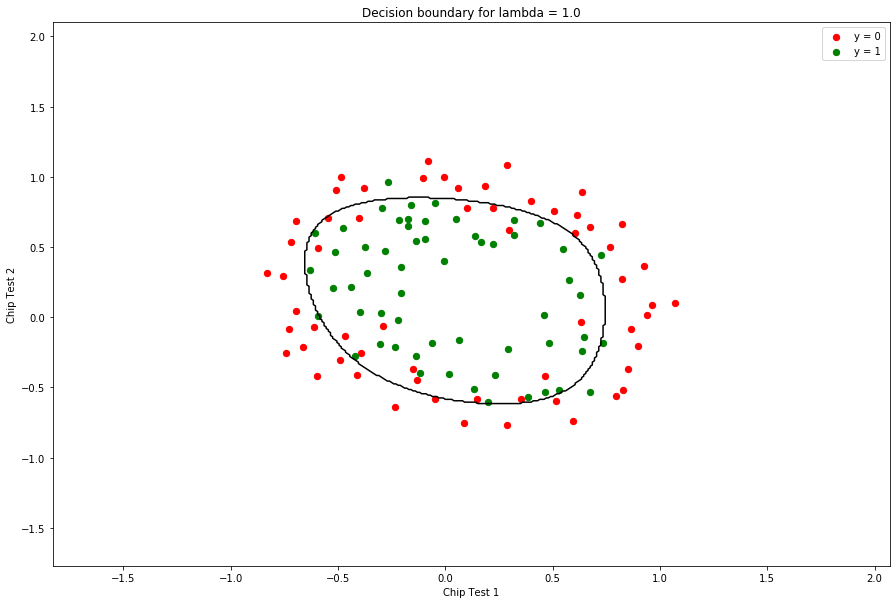

Optimization terminated successfully.
         Current function value: 0.648216
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Theta found by fmin_bfgs is [ 0.32617622 -0.00818412  0.16576245 -0.44671253 -0.11184499 -0.27889549
 -0.07141464 -0.05796267 -0.06515769 -0.10636125 -0.3367737  -0.01298218
 -0.11677557 -0.02812652 -0.28605514 -0.11612309 -0.03708065 -0.02244028
 -0.0489023  -0.0416696  -0.18673753 -0.2533692  -0.0029125  -0.05800253
 -0.00053336 -0.06356787 -0.01208223 -0.27149275]
Final loss is 0.6164


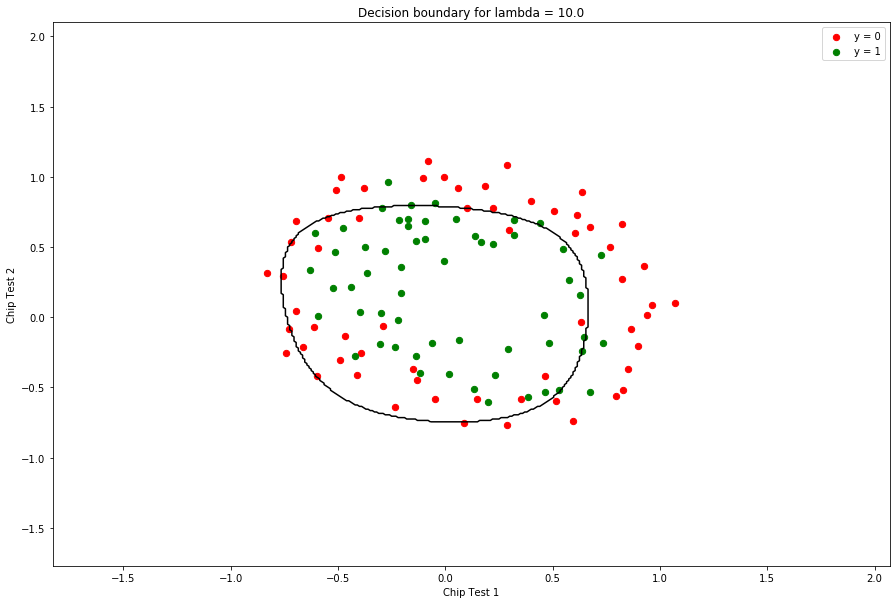

Optimization terminated successfully.
         Current function value: 0.686484
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Theta found by fmin_bfgs is [ 0.02188603 -0.01748169  0.00571031 -0.0551694  -0.01314888 -0.03859919
 -0.01846356 -0.00773236 -0.00892434 -0.02280491 -0.04343876 -0.00235623
 -0.01415631 -0.00349509 -0.04143634 -0.02100597 -0.00471924 -0.00359133
 -0.00632236 -0.00502443 -0.03197706 -0.03416353 -0.00107628 -0.00702623
 -0.00038506 -0.0079824  -0.00154778 -0.04108711]
Final loss is 0.6804


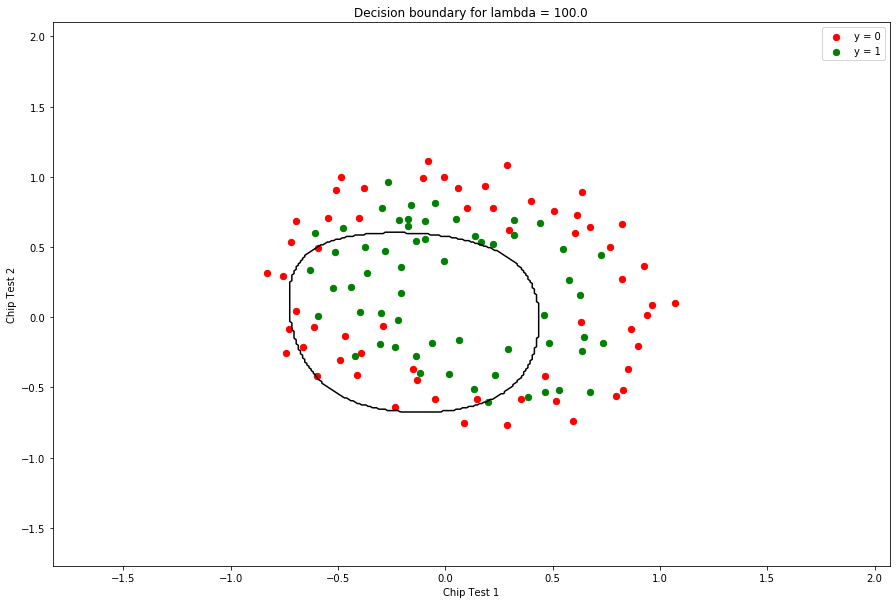

In [6]:
reg_lr2 = RegLogisticRegressor()
reg = [0.0, 1.0, 10.0, 100.0]
for r in reg:
    theta_opt2 = reg_lr2.train(XX, y, reg=r, num_iters=1000,norm=False)
    loss = reg_lr2.loss(theta_opt2, XX, y, 0.0)
    print(f"Theta found by fmin_bfgs is {theta_opt2}")
    print(f'Final loss is {loss:.4f}')
    
    # plot the decision boundary

    plot_utils.plot_decision_boundary_poly(X,y,theta_opt2,r,p,'Chip Test 1', 'Chip Test 2',['y = 0','y = 1'])
    plt.show()

# Comparing learned model with sklearn's logistic ridge regression

Theta found by sklearn with L2 reg: [[ 1.1421394   0.60141117  1.16712554 -1.87160974 -0.91574144 -1.26966693
   0.12658629 -0.3686536  -0.34511687 -0.17368655 -1.42387465 -0.04870064
  -0.60646669 -0.26935562 -1.16303832 -0.24327026 -0.20702143 -0.04326335
  -0.28028058 -0.286921   -0.46908732 -1.03633961  0.02914775 -0.29263743
   0.01728096 -0.32898422 -0.13801971 -0.93196832]]
Loss with sklearn theta: 0.4684


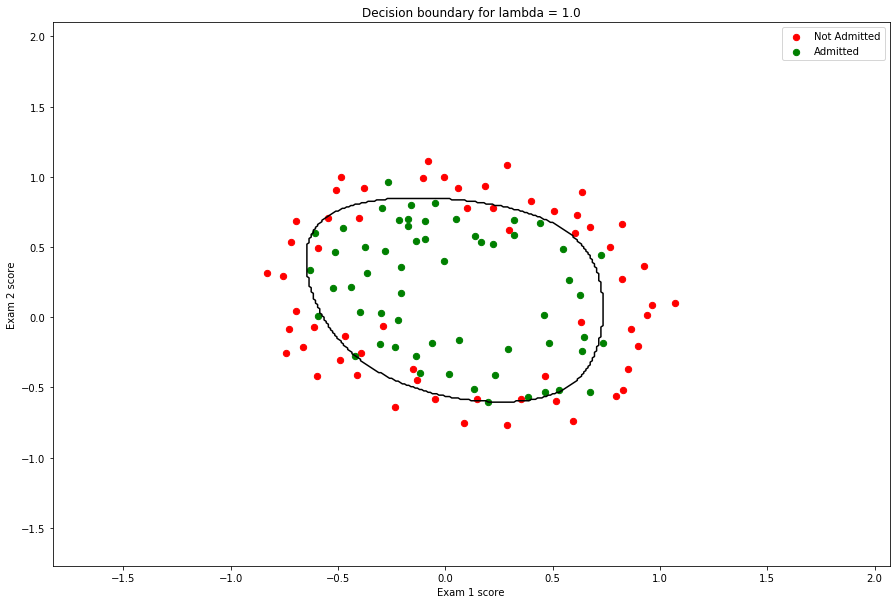

Computing regularization path ...


C:\Users\Darren\Anaconda3\envs\COMP_540\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Darren\Anaconda3\envs\COMP_540\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

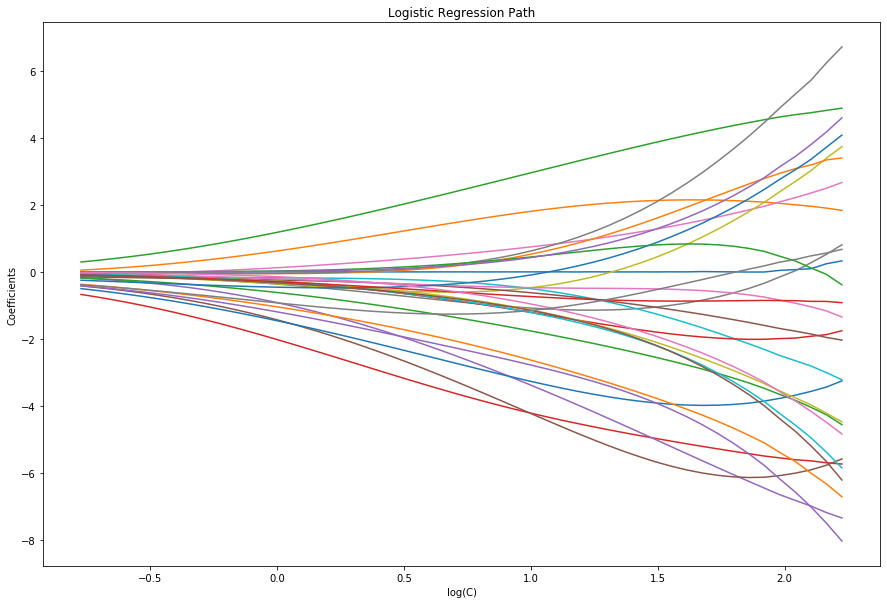

In [10]:
# Compare with model learned by sklearn's logistic regression with reg = 1/C
# the regularization parameter set below can be varied (on a logarithmic scale)

reg =1.0

# L2 regularization with sklearn LogisticRegression

from sklearn import linear_model
sk_logreg_l2 = linear_model.LogisticRegression(C=1.0/reg,solver='lbfgs',fit_intercept=False)
sk_logreg_l2.fit(XX,y)
print("Theta found by sklearn with L2 reg: %s" %sk_logreg_l2.coef_)
print("Loss with sklearn theta: %.4f" %reg_lr1.loss(sk_logreg_l2.coef_[0],XX,y,0.0))

plot_utils.plot_decision_boundary_sklearn_poly(X,y,sk_logreg_l2,reg,p,'Exam 1 score', 'Exam 2 score',['Not Admitted','Admitted'])
plt.show()

plot_utils.plot_regularization_path(XX,y,'l2')
plt.show()

# L1 regularized logistic regression

Theta found by sklearn with L1 reg: [[ 1.86958166  0.6865802   1.28037386 -4.86241287 -1.62176824 -2.34223537
   0.          0.          0.          0.          0.          0.
   0.          0.         -2.36732439  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
Loss with sklearn theta: 0.4382


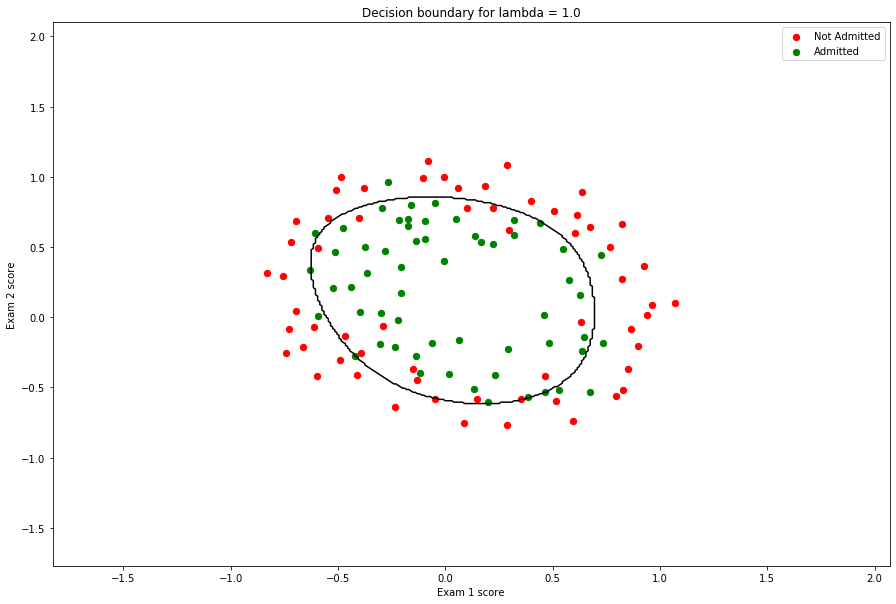

Computing regularization path ...


C:\Users\Darren\Anaconda3\envs\COMP_540\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Darren\Anaconda3\envs\COMP_540\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Darren\Anaconda3\envs\COMP_540\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


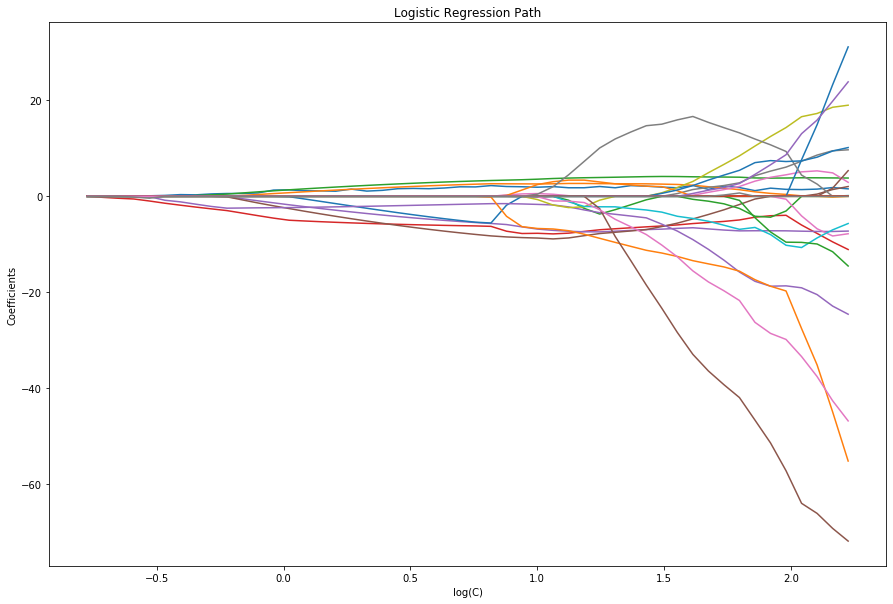

In [11]:
# L1 regularization witk sklearn LogisticRegression

sk_logreg_l1 = linear_model.LogisticRegression(C=1.0/reg,solver='liblinear',fit_intercept=False,penalty='l1')
sk_logreg_l1.fit(XX,y)
print("Theta found by sklearn with L1 reg: %s" %sk_logreg_l1.coef_)
print("Loss with sklearn theta: %.4f" %reg_lr1.loss(sk_logreg_l1.coef_[0],XX,y,0.0))

plot_utils.plot_decision_boundary_sklearn_poly(X,y,sk_logreg_l1,reg,p,'Exam 1 score', 'Exam 2 score',['Not Admitted','Admitted'])
plt.show()
# plot regularization paths for L1 regression
# Exploration of L1 regularization 
# 
plot_utils.plot_regularization_path(XX,y,'l1')
plt.show()

### Try varying $\lambda$

Theta found by sklearn with L2 reg: [[ 3.74522253  2.0107989   4.61214155 -5.45414606 -6.67189659 -5.94010197
   2.151067   -0.10213816  2.45921341 -2.5147764  -3.80255072  2.98381388
  -3.77718733 -1.96294589 -6.31923347 -1.71938626 -0.86707608  4.99914053
  -3.62305721 -4.32524672  2.85157949 -5.47204508  0.451985   -0.88342842
   3.20815871 -4.50102689 -3.62599862  0.26743957]]
Loss with sklearn theta: 0.3167


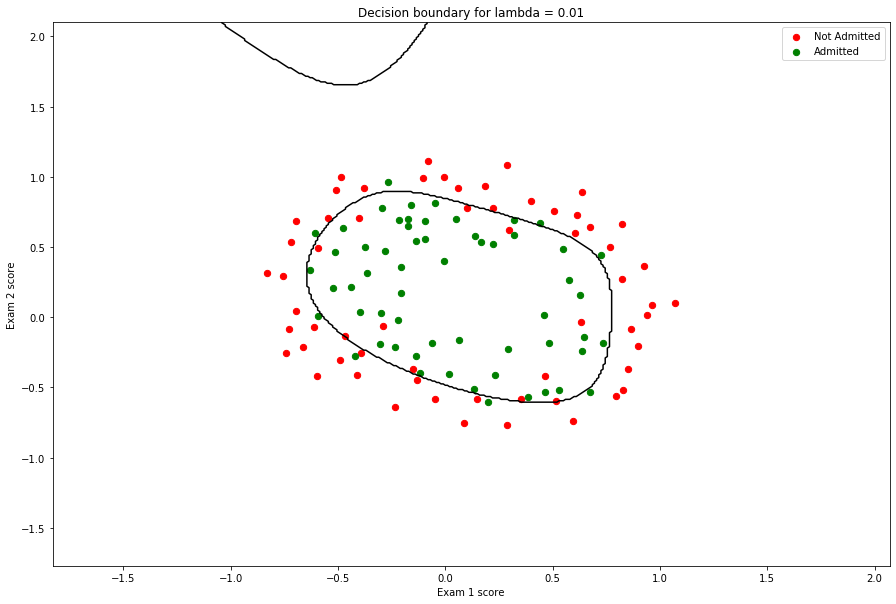

Theta found by sklearn with L2 reg: [[ 2.65855183  1.76427994  2.91364412 -4.03385629 -3.34849756 -4.0181188
   0.76777199 -1.08648166 -0.47195071 -0.4774888  -3.27598952  0.54686285
  -1.80180787 -1.17932445 -2.79104067 -0.62127841 -0.4711418   0.61454641
  -1.14697992 -1.20796935 -0.10569617 -2.66246949  0.45857402 -0.76144039
   0.43744164 -1.17502213 -0.93753591 -1.20049576]]
Loss with sklearn theta: 0.3538


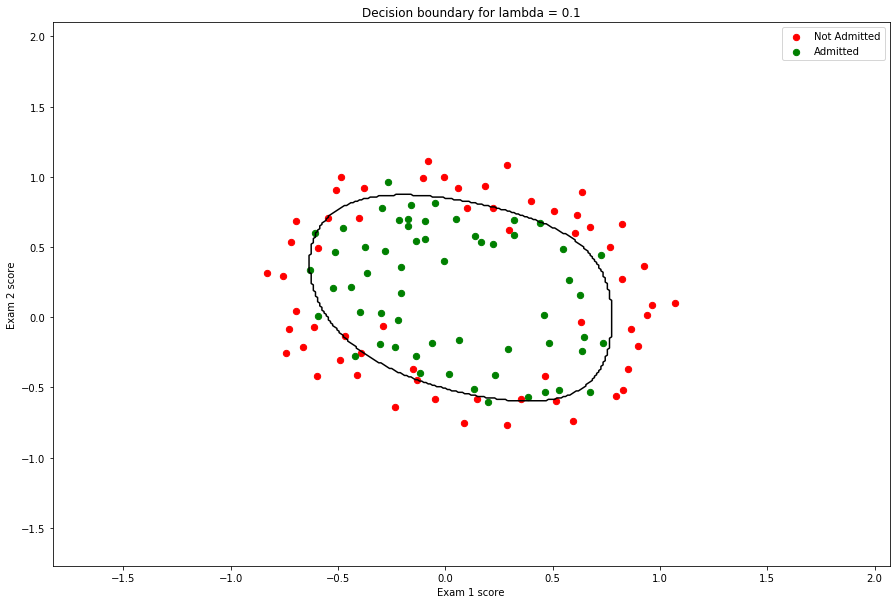

Theta found by sklearn with L2 reg: [[ 1.1421394   0.60141117  1.16712554 -1.87160974 -0.91574144 -1.26966693
   0.12658629 -0.3686536  -0.34511687 -0.17368655 -1.42387465 -0.04870064
  -0.60646669 -0.26935562 -1.16303832 -0.24327026 -0.20702143 -0.04326335
  -0.28028058 -0.286921   -0.46908732 -1.03633961  0.02914775 -0.29263743
   0.01728096 -0.32898422 -0.13801971 -0.93196832]]
Loss with sklearn theta: 0.4684


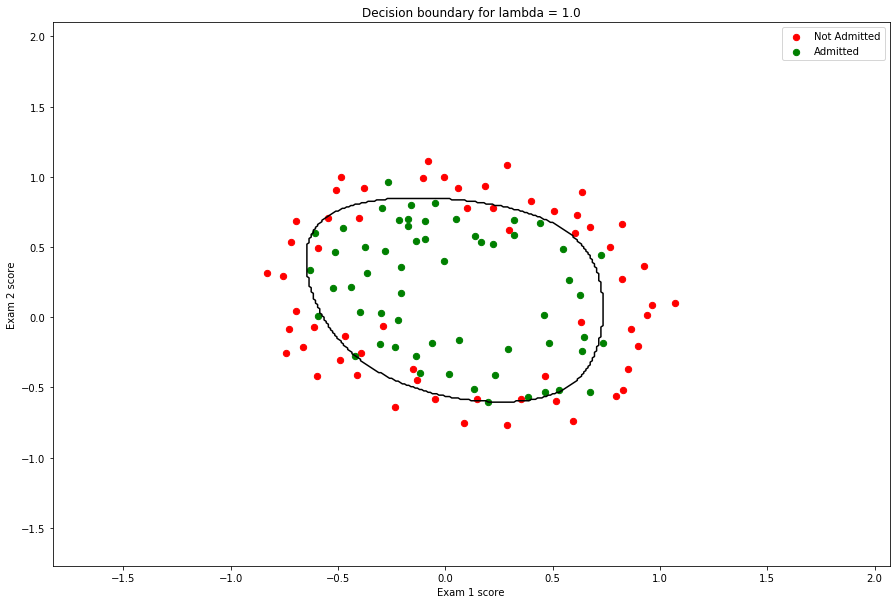

Theta found by sklearn with L2 reg: [[ 0.21469236 -0.00761966  0.17611687 -0.4012903  -0.11745553 -0.23188083
  -0.06668596 -0.05584267 -0.06215384 -0.09710193 -0.31766892 -0.01468057
  -0.10913398 -0.03014551 -0.26764027 -0.11186999 -0.03627398 -0.02114738
  -0.04753651 -0.04038118 -0.18117647 -0.24308692 -0.00364108 -0.05525352
  -0.00101451 -0.06094026 -0.01293964 -0.26287463]]
Loss with sklearn theta: 0.6216


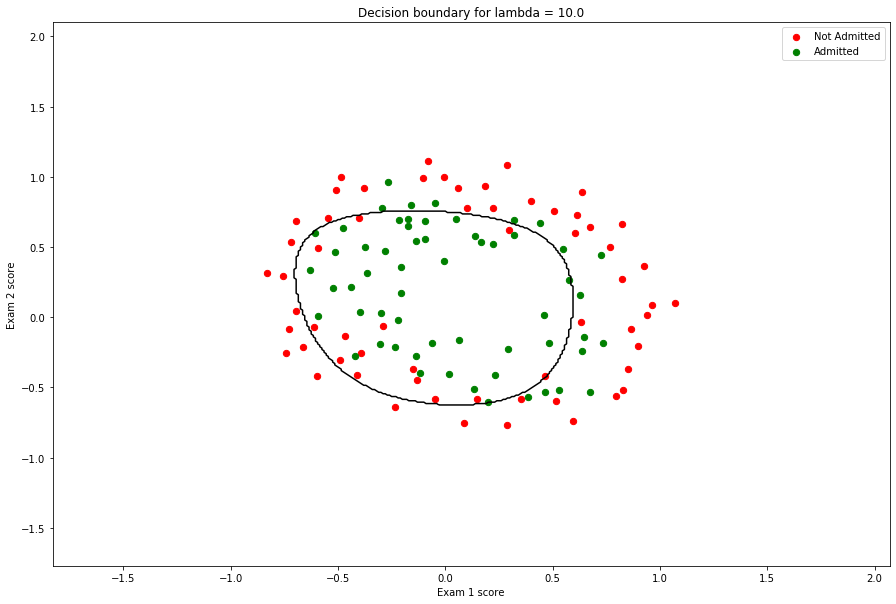

Theta found by sklearn with L2 reg: [[ 0.00468635 -0.01726848  0.0064196  -0.05402665 -0.01327551 -0.03727145
  -0.01821195 -0.00761037 -0.00885306 -0.02224573 -0.04288369 -0.00238585
  -0.01393196 -0.00354828 -0.04072376 -0.02078577 -0.00467203 -0.00354978
  -0.00624894 -0.00500393 -0.03153159 -0.03381515 -0.00108319 -0.00694192
  -0.0003945  -0.00788595 -0.00157683 -0.04058858]]
Loss with sklearn theta: 0.6806


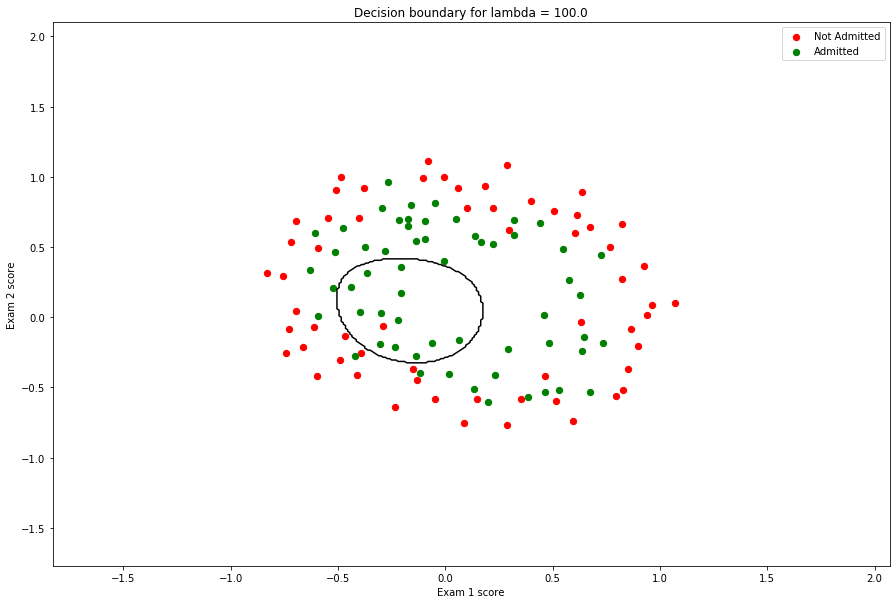

Computing regularization path ...


C:\Users\Darren\Anaconda3\envs\COMP_540\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Darren\Anaconda3\envs\COMP_540\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

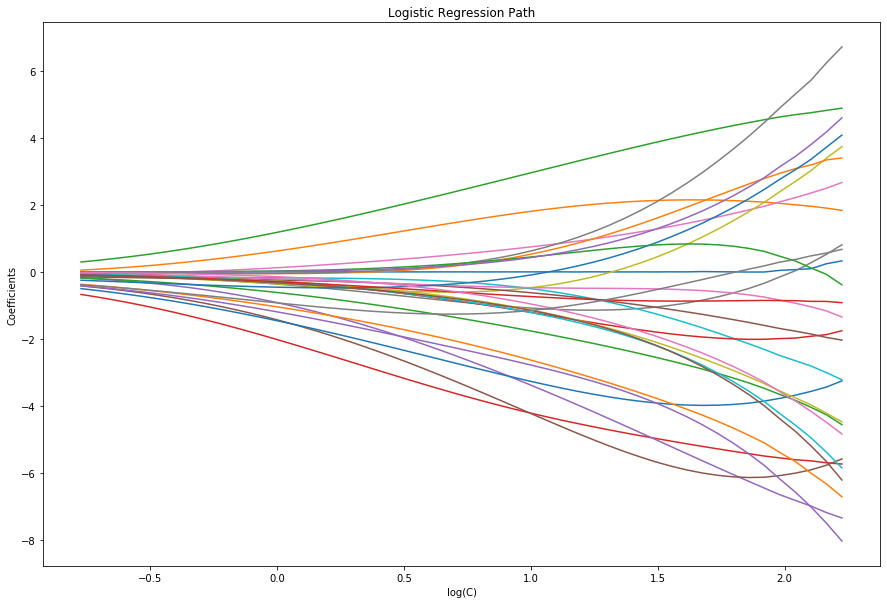

In [12]:
# L2 regulization
from sklearn import linear_model
reg = [0.01, 0.1, 1.0, 10.0, 100.0]
for reg in reg:
    sk_logreg_l2 = linear_model.LogisticRegression(C=1.0/reg,solver='lbfgs',fit_intercept=False)
    sk_logreg_l2.fit(XX,y)
    print("Theta found by sklearn with L2 reg: %s" %sk_logreg_l2.coef_)
    print("Loss with sklearn theta: %.4f" %reg_lr1.loss(sk_logreg_l2.coef_[0],XX,y,0.0))
    
    plot_utils.plot_decision_boundary_sklearn_poly(X,y,sk_logreg_l2,reg,p,'Exam 1 score', 'Exam 2 score',['Not Admitted','Admitted'])
    plt.show()
    
plot_utils.plot_regularization_path(XX,y,'l2')
plt.show()

Theta found by sklearn with L1 reg: [[  3.14029475   0.31601738   3.81524651  -3.91326249  -7.20504325
    0.           4.65537212   6.37429162  15.04574746   0.
    0.           0.          -2.64685635   0.         -18.58061007
    0.          -0.86739564   8.86565607   0.         -11.30833628
    7.14445115 -20.05624396 -10.12184736   0.           9.12588432
  -59.03984207 -29.87648491   0.        ]]
Loss with sklearn theta: 0.2911


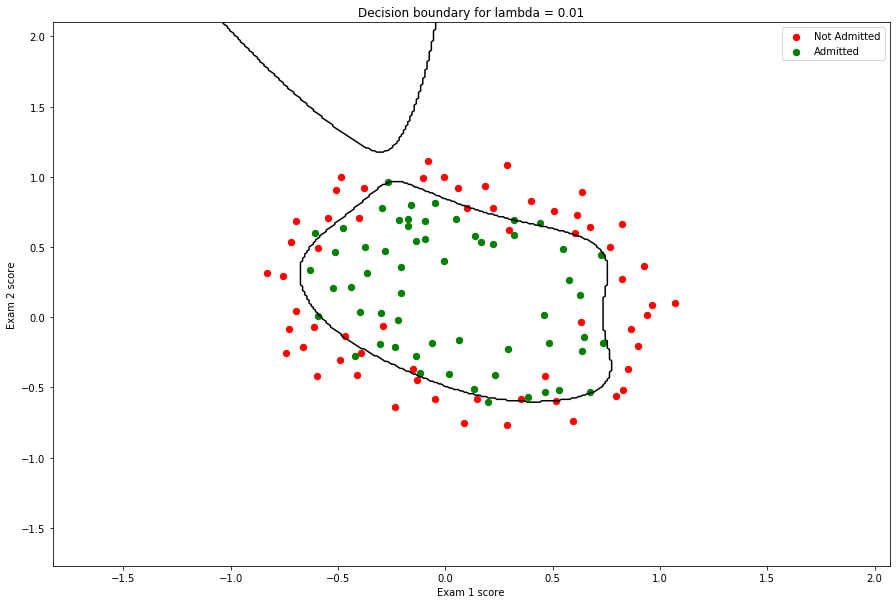

Theta found by sklearn with L1 reg: [[ 4.0007414   2.5660892   3.56295544 -7.68092377 -6.80987978 -8.65560155
   0.59342954 -0.2053051   0.          0.          0.          2.44946344
   0.          0.         -1.71172138  0.          0.          0.35472979
  -0.67032265  0.          0.         -6.72300088  0.          0.
   0.          0.         -0.06240988  0.        ]]
Loss with sklearn theta: 0.3364


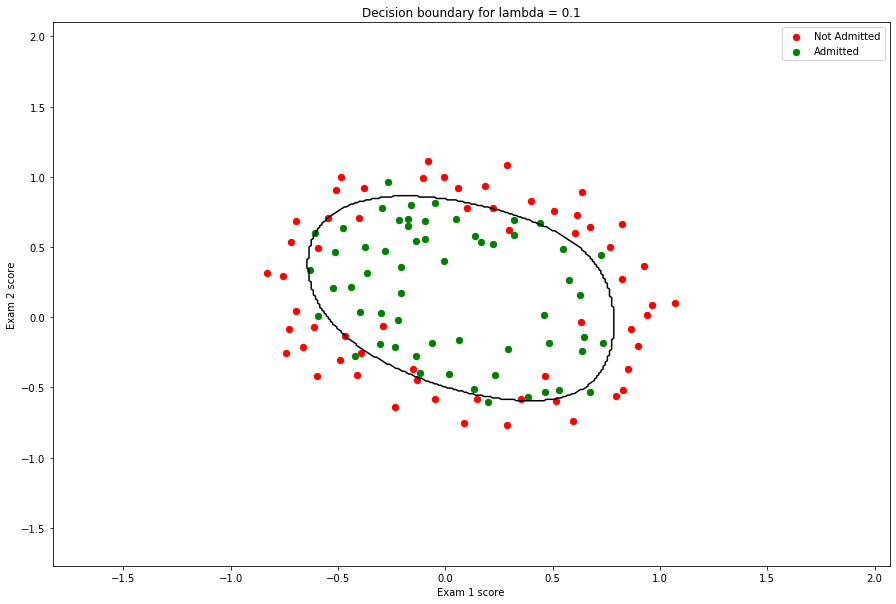

Theta found by sklearn with L1 reg: [[ 1.86973831  0.68661991  1.28039292 -4.86260864 -1.62177331 -2.34271751
   0.          0.          0.          0.          0.          0.
   0.          0.         -2.3669713   0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
Loss with sklearn theta: 0.4381


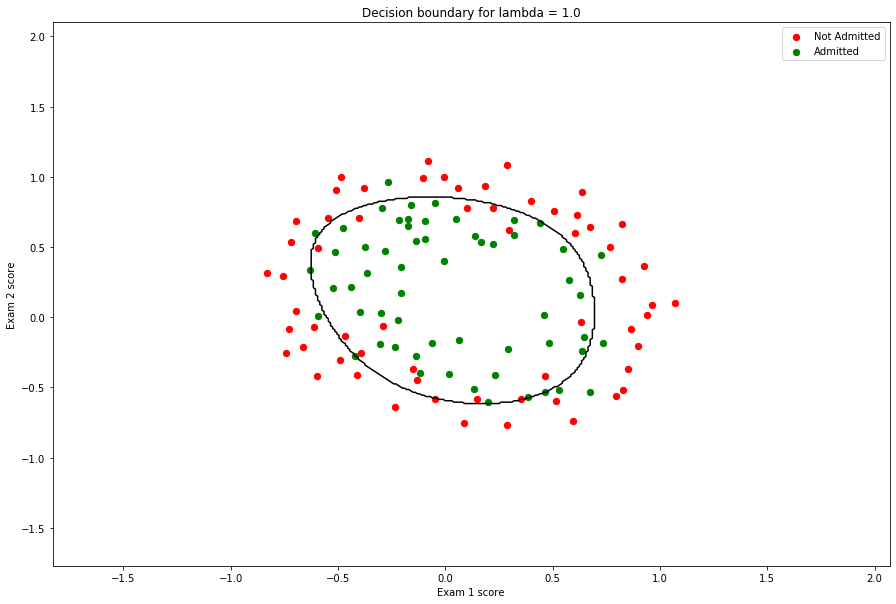

Theta found by sklearn with L1 reg: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]
Loss with sklearn theta: 0.6931


D:\Rice\COMP 540\Statistical-ML\hw2\logreg\plot_utils.py:103: UserWarning: No contour levels were found within the data range.
  plt.contour(xx1,xx2,Z,cmap=plt.cm.gray,levels=[0.5])


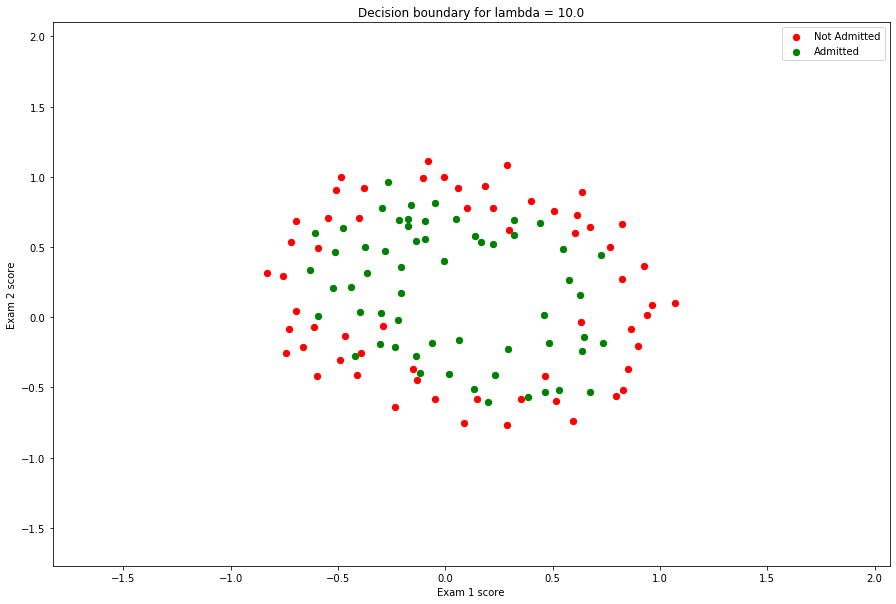

Theta found by sklearn with L1 reg: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]
Loss with sklearn theta: 0.6931


D:\Rice\COMP 540\Statistical-ML\hw2\logreg\plot_utils.py:103: UserWarning: No contour levels were found within the data range.
  plt.contour(xx1,xx2,Z,cmap=plt.cm.gray,levels=[0.5])


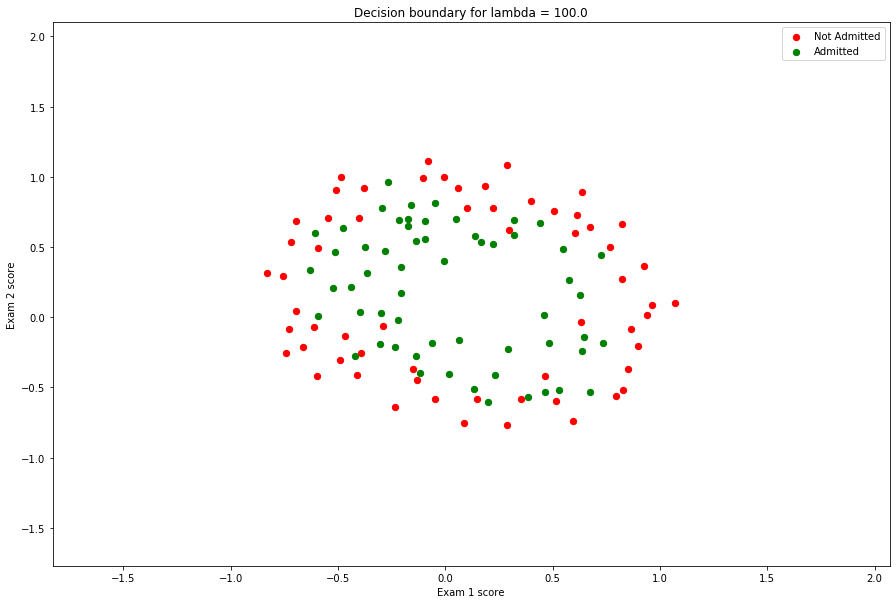

Computing regularization path ...


C:\Users\Darren\Anaconda3\envs\COMP_540\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Darren\Anaconda3\envs\COMP_540\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


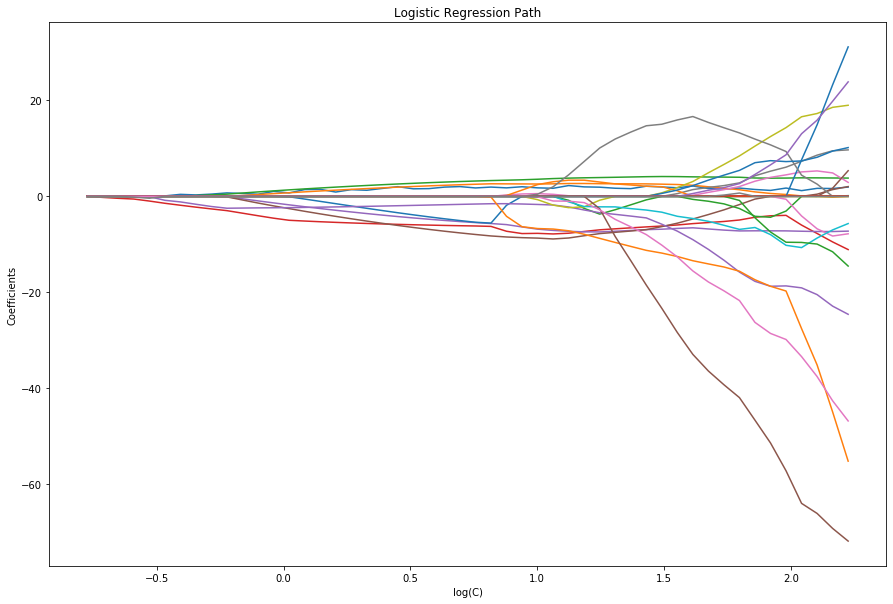

In [13]:
# L1 regulization
from sklearn import linear_model
reg = [0.01, 0.1, 1.0, 10.0, 100.0]
for reg in reg:
    sk_logreg_l1 = linear_model.LogisticRegression(C=1.0/reg,solver='liblinear',fit_intercept=False,penalty='l1')
    sk_logreg_l1.fit(XX,y)
    print("Theta found by sklearn with L1 reg: %s" %sk_logreg_l1.coef_)
    print("Loss with sklearn theta: %.4f" %reg_lr1.loss(sk_logreg_l1.coef_[0],XX,y,0.0))
    
    plot_utils.plot_decision_boundary_sklearn_poly(X,y,sk_logreg_l1,reg,p,'Exam 1 score', 'Exam 2 score',['Not Admitted','Admitted'])
    plt.show()
    # plot regularization paths for L1 regression
    # Exploration of L1 regularization
plot_utils.plot_regularization_path(XX,y,'l1')
plt.show()